# **TASK # 02**

# **Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

# **Sample Dataset** :-https://www.kaggle.com/c/titanic/data

# **STEP 1: LOADING THE DATASET**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
#url = "https://www.kaggle.com/c/titanic/data"
# Assuming you've downloaded the dataset as "titanic.csv"
df = pd.read_csv("train.csv")

# Display the first few rows of the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# **STEP 2: CLEANING THE DATASET**

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in Age with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns like PassengerId, Name, Ticket, and Cabin
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Verify cleaned dataset
print(df.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


# **STEP 3: EXPLORING DATA ANALYSIS**

<ipython-input-6-f52e6988f447>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


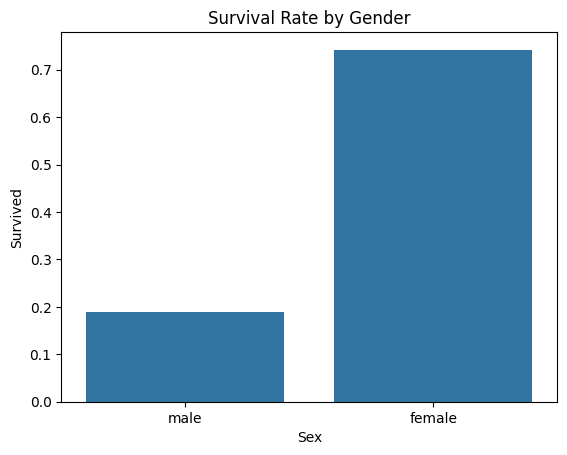

<ipython-input-6-f52e6988f447>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


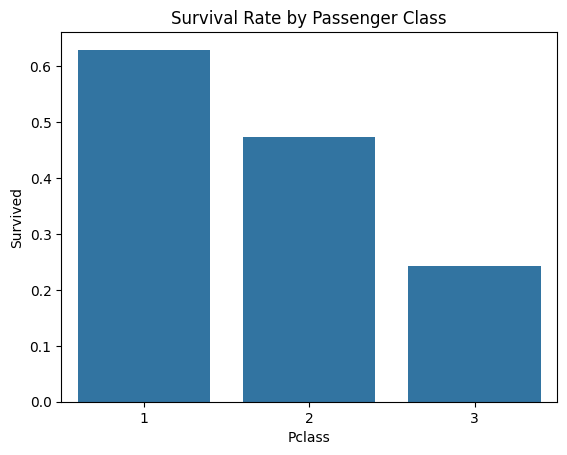

<ipython-input-6-f52e6988f447>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, ci=None)


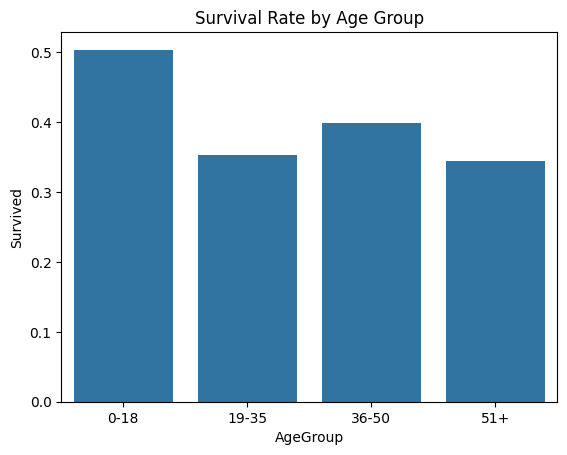

<ipython-input-6-f52e6988f447>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ci=None)


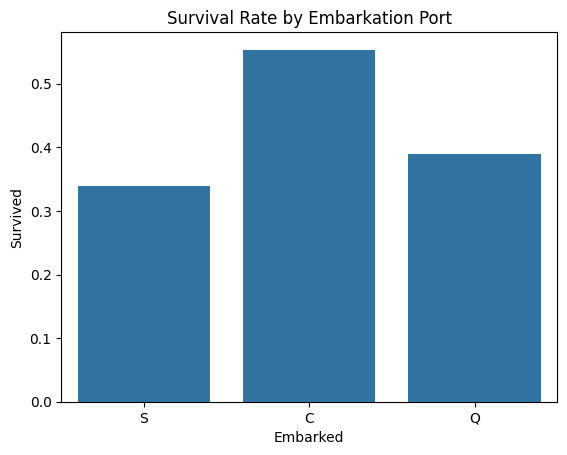

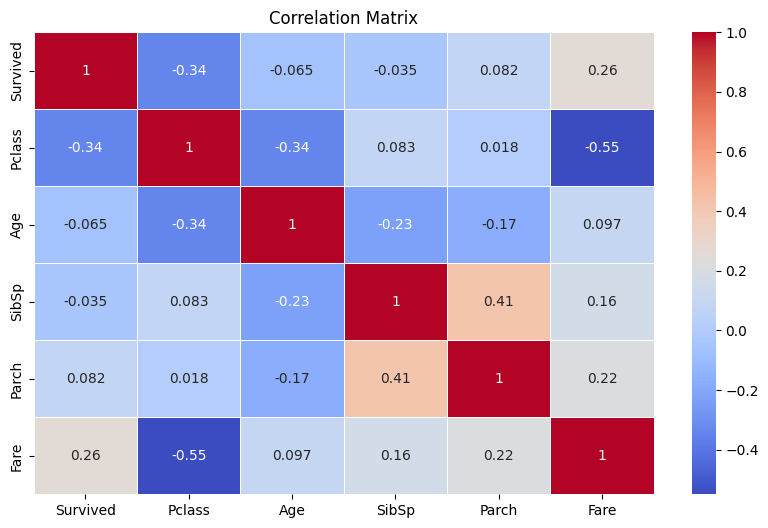

In [6]:
# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.show()

# Visualize survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Visualize survival rate by age group
age_bins = [0, 18, 35, 50, np.inf]
age_labels = ['0-18', '19-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
sns.barplot(x='AgeGroup', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Age Group')
plt.show()

# Visualize survival rate by embarkation port
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Ensure only numeric columns are used for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Explore correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
